In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

%matplotlib inline

In [2]:
#load the data
df = pd.read_csv('C:/data/Advertising.csv', index_col=0)

In [3]:
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
df.columns = ['TV','Radio','Newspaper','Sales']

In [5]:
df.shape

(200, 4)

In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
#check the missing value
df.isna().any()

TV           False
Radio        False
Newspaper    False
Sales        False
dtype: bool

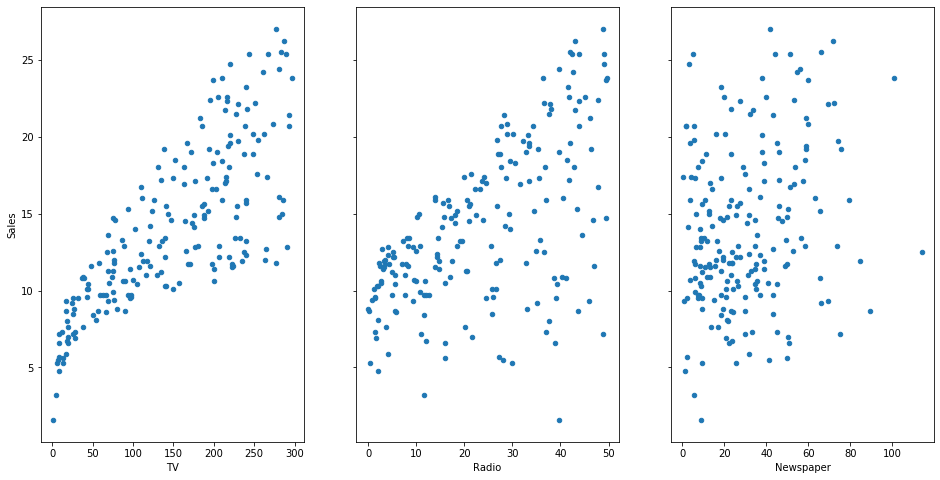

In [8]:
#ploting data using scatter plot
fig,axs = plt.subplots(1,3,sharey=True)
df.plot(kind='scatter',x='TV',y='Sales',ax=axs[0], figsize=(16,8))
df.plot(kind='scatter',x='Radio',y='Sales',ax=axs[1])
df.plot(kind='scatter',x='Newspaper',y='Sales',ax=axs[2])

In [9]:
#devide data into feature and target
feature_cols =['TV']
x = df[feature_cols]
y = df.Sales

In [10]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
print(lm.intercept_)
print(lm.coef_)

7.0325935491276965
[0.04753664]


In [12]:
7.032594+0.047537*50

9.409444

In [13]:
#predict using new tv data
x_new = pd.DataFrame({'TV':[50]})
x_new.head()

,TV
0,50


In [14]:
lm.predict(x_new)

array([9.40942557])

In [15]:
#use the smallest and largest value and predict the value
x_new = pd.DataFrame({'TV':[df.TV.min(),df.TV.max()]})
x_new.head()

,TV
0,0.7
1,296.4


In [16]:
preds = lm.predict(x_new)
preds

array([ 7.0658692 , 21.12245377])

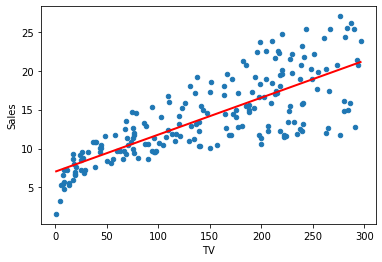

In [17]:
df.plot(kind='scatter', x='TV', y = 'Sales')
plt.plot(x_new,preds,c='red',linewidth=2)

In [18]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='Sales ~ TV', data=df).fit()

In [19]:
lm.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [20]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [21]:
lm.rsquared

0.611875050850071

In [22]:
feature_cols = ['TV','Radio','Newspaper']
x=df[feature_cols]
y=df.Sales

from sklearn import model_selection
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(x,y,test_size=0.3, random_state=42)

In [23]:
lm = LinearRegression()
lm.fit(x,y)
print(lm.intercept_)
print(lm.coef_)

2.9388893694594085
[ 0.04576465  0.18853002 -0.00103749]


In [24]:
lm = LinearRegression()
lm.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
print(lm.intercept_)
print(lm.coef_)

prediction = lm.predict(xtest)
print(sqrt(mean_squared_error(ytest,prediction)))

2.7089490925159048
[0.04405928 0.1992875  0.00688245]
1.9485372043446394


In [27]:
#check the summery output
lm = smf.ols(formula='Sales~TV + Radio + Newspaper', data=df).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 01 Aug 2020   Prob (F-statistic):           1.58e-96
Time:                        19:47:21   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
lm = smf.ols(formula='Sales~TV+Radio',data=df).fit()
lm.rsquared

0.8971942610828957

In [29]:
lm = smf.ols(formula='Sales~TV+Radio+Newspaper',data=df).fit()
lm.rsquared

0.8972106381789522

In [33]:
import numpy as np
np.random.seed(12345)

nums = np.random.rand(len(df))
mask_large = nums>0.5

df['Size'] ='small'
df.loc[mask_large,'Size']='large'
df.head()

,TV,Radio,Newspaper,Sales,Size
1,230.1,37.8,69.2,22.1,large
2,44.5,39.3,45.1,10.4,small
3,17.2,45.9,69.3,9.3,small
4,151.5,41.3,58.5,18.5,small
5,180.8,10.8,58.4,12.9,large


In [35]:
df['IsLarge'] = df.Size.map({'small':0,'large':1})
df.head()

,TV,Radio,Newspaper,Sales,Size,IsLarge
1,230.1,37.8,69.2,22.1,large,1
2,44.5,39.3,45.1,10.4,small,0
3,17.2,45.9,69.3,9.3,small,0
4,151.5,41.3,58.5,18.5,small,0
5,180.8,10.8,58.4,12.9,large,1


In [39]:
feature_cols =['TV','Radio','Newspaper','IsLarge']
x = df[feature_cols]
y = df.Sales

lm=LinearRegression()
lm.fit(x,y)

zip(feature_cols,lm.coef_)

In [40]:
np.random.seed(123456)

nums = np.random.rand(len(df))
mask_suburban = (nums>0.33) & (nums<0.66)
mask_urban = nums>0.66
df['Area']='rural'
df.loc[mask_suburban,'Area']='suburban'
df.loc[mask_urban,'Area']='urban'
df.head()

,TV,Radio,Newspaper,Sales,Size,IsLarge,Area
1,230.1,37.8,69.2,22.1,large,1,rural
2,44.5,39.3,45.1,10.4,small,0,urban
3,17.2,45.9,69.3,9.3,small,0,rural
4,151.5,41.3,58.5,18.5,small,0,urban
5,180.8,10.8,58.4,12.9,large,1,suburban


In [44]:
area_dummies = pd.get_dummies(df.Area,prefix='Area').iloc[:,1:]

df=pd.concat([df,area_dummies],axis=1)
df.head()

,TV,Radio,Newspaper,Sales,Size,IsLarge,Area,Area_suburban,Area_urban
1,230.1,37.8,69.2,22.1,large,1,rural,0,0
2,44.5,39.3,45.1,10.4,small,0,urban,0,1
3,17.2,45.9,69.3,9.3,small,0,rural,0,0
4,151.5,41.3,58.5,18.5,small,0,urban,0,1
5,180.8,10.8,58.4,12.9,large,1,suburban,1,0


In [48]:
feature_cols =['TV','Radio','Newspaper','IsLarge','Area_suburban','Area_urban']
x = df[feature_cols]
y = df.Sales

lm=LinearRegression()
lm.fit(x,y)

print(feature_cols,lm.coef_)

['TV', 'Radio', 'Newspaper', 'IsLarge', 'Area_suburban', 'Area_urban'] [ 0.04574401  0.1878667  -0.0010877   0.07739661 -0.10656299  0.26813802]
